第一題

Q1
我的myknn_regressor是先算出每個xtest點到各個xtrain點的距離，再利用一個跑k次的loop找出最近的k個點並存入陣列中紀錄，以方便後續的equal_weight和remove_outier做計算。

In [2]:
import pickle
import math
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors

from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
with open('msd_data1.pickle', 'rb') as f:
     data = pickle.load(f)
# print(data)
X_train = data['X_train']
X_test = data['X_test']
Y_train = data['Y_train']
Y_test = data['Y_test']

In [3]:
class myknn_regressor:
    def __init__(self, k, act):
        self.k = k
        self.name = act
        
    def fit(self, X_tr, Y_tr):
        self.X_tr = X_tr
        self.Y_tr = Y_tr
        
    def predict(self, X_t):
        self.testd = X_t
        arr = []
        for i in range(0, len(self.testd)):
#             if i%1000 == 0:
#                 print(i)
            d = []
            d = np.sum((self.X_tr - self.testd[i])**2, axis = 1)
            numarr = []
            for j in range(0, self.k):
                x = np.argmin(d)
                numarr.append(self.Y_tr[x])
                d[x] = float('inf')
            na = np.array(numarr)
#             print(na)
            
            if self.name == 'equal_weight' or self.k < 10:
                arr.append(sum(na)/len(na))
            elif self.name == 'remove_outier' and self.k >= 10:
                q = np.percentile(na, (25, 50, 75))
                q1 = q[0]
                q3 = q[2]
                IQR = q3 - q1
                remarr = []
                for w in range(0, 20):
                    if na[w] >= q1 - 1.5*IQR and na[w] <= q3 + IQR*1.5:
                        remarr.append(na[w])
                arr.append(sum(remarr)/len(remarr))
        result1 = np.array(arr)
        result = np.round(result1)
        print('predict y:', result[0:20])
        RMSE = (sum((result - Y_test)**2)/len(result))**(1/2)
        print('RMSE is:',RMSE)
        return RMSE

Q2:
不考慮outliers直接利用knn predict，結果如下。

In [4]:
X_tra = preprocessing.scale(X_train)
X_tes = preprocessing.scale(X_test)
myknn = myknn_regressor(20, "equal_weight")
myknn.fit(X_tra, Y_train)
ypred = myknn.predict(X_tes)

predict y: [1993. 1994. 2000. 1992. 1993. 1998. 1987. 1991. 2002. 2003. 2001. 1999.
 1996. 1997. 1995. 1997. 1992. 1999. 2004. 1996.]
RMSE is: 10.29443215205838


Q3:
考慮outliers，使用knn predict將outliers剔除，結果如下。
remove_outier得出的結果(RMSE)比equal_weight還要更好(低)。

In [5]:
X_tra = preprocessing.scale(X_train)
X_tes = preprocessing.scale(X_test)
myknn = myknn_regressor(20, "remove_outier")
myknn.fit(X_tra, Y_train)
ypred = myknn.predict(X_tes)

predict y: [1993. 1994. 2000. 1993. 1993. 2000. 1987. 1991. 2002. 2004. 2001. 2001.
 1996. 1997. 1999. 1997. 1992. 2004. 2004. 1996.]
RMSE is: 10.229173964695292


第二題

case1

In [6]:
s_rmse_val = []
X_tra = preprocessing.scale(X_train)
X_tes = preprocessing.scale(X_test)
klist = [1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200]
for x in range(0, len(klist)):
    model = neighbors.KNeighborsRegressor(n_neighbors = klist[x])
    model.fit(X_tra, Y_train)
    pred=model.predict(X_tes)
    error = sqrt(mean_squared_error(Y_test,pred))
    s_rmse_val.append(error)
    print('RMSE value for k= ' , klist[x] , 'is:', error)

RMSE value for k=  1 is: 13.94019368588543
RMSE value for k=  2 is: 12.097861381252473
RMSE value for k=  3 is: 11.448255568232025
RMSE value for k=  4 is: 11.043653909221652
RMSE value for k=  5 is: 10.900440969673351
RMSE value for k=  10 is: 10.46269085847422
RMSE value for k=  15 is: 10.359457586258149
RMSE value for k=  20 is: 10.292158827638316
RMSE value for k=  25 is: 10.261870966511582
RMSE value for k=  30 is: 10.257804039057469
RMSE value for k=  35 is: 10.235202506063867
RMSE value for k=  40 is: 10.209997388181186
RMSE value for k=  45 is: 10.204546360311813
RMSE value for k=  50 is: 10.228160003962914
RMSE value for k=  55 is: 10.232596529500087
RMSE value for k=  60 is: 10.242063661955804
RMSE value for k=  80 is: 10.245796391589902
RMSE value for k=  100 is: 10.260879617914505
RMSE value for k=  120 is: 10.284962306823381
RMSE value for k=  140 is: 10.299767106540788
RMSE value for k=  160 is: 10.318954408812253
RMSE value for k=  180 is: 10.347841640420786
RMSE value f

case2

In [7]:
X_train = data['X_train']
X_test = data['X_test']
Y_train = data['Y_train']
Y_test = data['Y_test']
rmse_val = []
for x in range(0, len(klist)):
    model = neighbors.KNeighborsRegressor(n_neighbors = klist[x])
    model.fit(X_train, Y_train)
    pred=model.predict(X_test)
    error = sqrt(mean_squared_error(Y_test,pred))
    rmse_val.append(error)
    print('RMSE value for k= ' , klist[x] , 'is:', error)

RMSE value for k=  1 is: 14.923638966418345
RMSE value for k=  2 is: 12.777499755429464
RMSE value for k=  3 is: 12.075674967716129
RMSE value for k=  4 is: 11.767805657810635
RMSE value for k=  5 is: 11.466392632384432
RMSE value for k=  10 is: 11.07746090040493
RMSE value for k=  15 is: 10.888979137947995
RMSE value for k=  20 is: 10.797788546734928
RMSE value for k=  25 is: 10.79007301797969
RMSE value for k=  30 is: 10.75026561256701
RMSE value for k=  35 is: 10.717738719772289
RMSE value for k=  40 is: 10.714437504678756
RMSE value for k=  45 is: 10.698494013475852
RMSE value for k=  50 is: 10.69110105960404
RMSE value for k=  55 is: 10.682608734124413
RMSE value for k=  60 is: 10.672535729098724
RMSE value for k=  80 is: 10.662907517124493
RMSE value for k=  100 is: 10.67701950452466
RMSE value for k=  120 is: 10.683139638996407
RMSE value for k=  140 is: 10.687017556442052
RMSE value for k=  160 is: 10.691630026202155
RMSE value for k=  180 is: 10.69071978380711
RMSE value for k

case3

In [8]:
my_val = []
X_tra = preprocessing.scale(X_train)
X_tes = preprocessing.scale(X_test)

class myknn_regressor:
    def __init__(self, k, act):
        self.k = k
        self.name = act
        
    def fit(self, X_tr, Y_tr):
        self.X_tr = X_tr
        self.Y_tr = Y_tr
        
    def predict(self, X_t):
        self.testd = X_t
        arr = []
        for i in range(0, len(self.testd)):
#             if i%1000 == 0:
#                 print(i)
            d = []
            d = np.sum((self.X_tr - self.testd[i])**2, axis = 1)
            numarr = []
            for j in range(0, self.k):
                x = np.argmin(d)
                numarr.append(self.Y_tr[x])
                d[x] = float('inf')
            na = np.array(numarr)
#             print(na)
            
            if self.name == 'equal_weight' or self.k < 10:
                arr.append(sum(na)/len(na))
            elif self.name == 'remove_outier' and self.k >= 10:
                q = np.percentile(na, (25, 50, 75))
                q1 = q[0]
                q3 = q[2]
                IQR = q3 - q1
                remarr = []
                for w in range(0, self.k):
                    if na[w] >= q1 - 1.5*IQR and na[w] <= q3 + IQR*1.5:
                        remarr.append(na[w])
                arr.append(sum(remarr)/len(remarr))
        result1 = np.array(arr)
        result = np.round(result1)
#         print('predict y:', result[0:20])
        RMSE = (sum((result - Y_test)**2)/len(result))**(1/2)
        print('RMSE is:',RMSE)
        return RMSE

for x in range(0, len(klist)):
    myknn = myknn_regressor(klist[x], "remove_outier")
    myknn.fit(X_tra, Y_train)
    ypred = myknn.predict(X_tes)
    my_val.append(ypred)
    print('RMSE value for k= ' , klist[x] , 'is:', ypred)

RMSE is: 13.94019368588543
RMSE value for k=  1 is: 13.94019368588543
RMSE is: 12.097933707869291
RMSE value for k=  2 is: 12.097933707869291
RMSE is: 11.454358704586362
RMSE value for k=  3 is: 11.454358704586362
RMSE is: 11.050625924957071
RMSE value for k=  4 is: 11.050625924957071
RMSE is: 10.905732437576122
RMSE value for k=  5 is: 10.905732437576122
RMSE is: 10.506696277454044
RMSE value for k=  10 is: 10.506696277454044
RMSE is: 10.342759141866674
RMSE value for k=  15 is: 10.342759141866674
RMSE is: 10.229173964695292
RMSE value for k=  20 is: 10.229173964695292
RMSE is: 10.21934440167274
RMSE value for k=  25 is: 10.21934440167274
RMSE is: 10.197336253486332
RMSE value for k=  30 is: 10.197336253486332
RMSE is: 10.16011810954971
RMSE value for k=  35 is: 10.16011810954971
RMSE is: 10.096484536708804
RMSE value for k=  40 is: 10.096484536708804
RMSE is: 10.058760692384856
RMSE value for k=  45 is: 10.058760692384856
RMSE is: 10.09656707335056
RMSE value for k=  50 is: 10.096567

plot

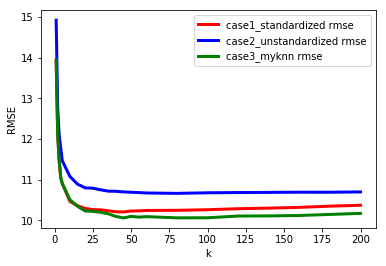

In [9]:
plt.xlabel('k')
plt.ylabel('RMSE')
line1, = plt.plot(klist, s_rmse_val, color = 'red', linewidth = 3, label = 'case1_standardized rmse')             
line2, = plt.plot(klist, rmse_val, color = 'blue', linewidth = 3, label = 'case2_unstandardized rmse')
line3, = plt.plot(klist, my_val, color = 'green', linewidth = 3, label = 'case3_myknn rmse')
plt.legend(handles = [line1, line2, line3], loc='upper right')
plt.show()

從圖中可以知道，data在經過標準化之後可以得到一個比較低的RMSE，相對而言更加優秀